In [1]:
%reset -f

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras import Input
from keras.datasets.mnist import load_data
from keras.layers import LeakyReLU
#from tensorflow.keras.optimizers import Adam
from keras.optimizers import adam_v2

# Importation et traitement des données

In [2]:
(X_train,y_train), (X_test, y_test) = load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train = X_train.reshape((60000,784))

In [5]:
X_train.shape

(60000, 784)

In [6]:
X_train = X_train.astype('float32')/255.0

In [7]:
X_train = 2*X_train-1

### Modèle discriminator

In [8]:
x0=Input(shape=(784,))
x1=Dense(128, activation=LeakyReLU(0.01))(x0)
x2=Dense(128, activation=LeakyReLU(0.01))(x1)
x3=Dense(128, activation=LeakyReLU(0.01))(x2)
x4=Dense(1, activation='sigmoid')(x3)

discriminator = Model(inputs=x0,outputs=x4)

In [9]:
discriminator.compile(optimizer=adam_v2.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

### Modèle generator

In [10]:
g0=Input(shape=100,)
g1=Dense(128, activation=LeakyReLU(0.01))(g0)
g2=Dense(128, activation=LeakyReLU(0.01))(g1)
g3=Dense(128, activation=LeakyReLU(0.01))(g2)
g4=Dense(784,activation='tanh')(g3)

generator= Model(inputs=g0,outputs=g4)

### Modèle GAN

In [11]:
x=Input(shape=(100,))

y=generator(x)

s=discriminator(y)

gan = Model(inputs=x, outputs=s)

In [12]:
gan.compile(optimizer=adam_v2.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


### Fonction qui génère les points dans l'espace latent

In [13]:
def generate_latent_space(latent_dim,n_samples):
    X = np.random.randn(n_samples,latent_dim)
    
    return X

### Fonction qui génère des données "vraies"

In [14]:
def generate_real_samples(dataset,n_samples):
    

    ix = np.random.randint(0,dataset.shape[0],n_samples) 
    # nécessaire pour tirer de vraies images du dataset qui en contient 60000
    
    X = dataset[ix]
            
    y = np.ones((n_samples,1))
    
    return X,y

In [15]:
X_real,s_real = generate_real_samples(X_train,100)

In [16]:
X_real.shape

(100, 784)

### Fonction qui génère des données "fausses"

In [17]:
def generate_fake_samples(generator,latent_dim,n_samples):
    
    gen = generate_latent_space(latent_dim,n_samples)
    
    X = generator.predict(gen)
            
    y = np.zeros((n_samples,1))
    
    return X,y

In [18]:
X_fake,y_fake = generate_fake_samples(generator,100,10)

In [19]:
X_fake

array([[-0.01348467,  0.08880653,  0.23921059, ...,  0.13159324,
         0.05757154,  0.00114595],
       [ 0.15987824,  0.00544708,  0.26305297, ...,  0.11817738,
         0.10019078, -0.08218624],
       [ 0.05352204,  0.121709  ,  0.12040026, ...,  0.01159938,
        -0.09899968, -0.17402759],
       ...,
       [ 0.18915154, -0.0524685 ,  0.32012507, ...,  0.23281682,
        -0.01118784, -0.20180821],
       [-0.02676331,  0.15142974,  0.25289553, ...,  0.0342391 ,
         0.04741159, -0.02451311],
       [ 0.25247544,  0.0165686 ,  0.1514028 , ...,  0.12945862,
         0.06816526, -0.08411493]], dtype=float32)

In [20]:
X_fake.shape

(10, 784)

In [21]:
y_fake.shape

(10, 1)

# Programme principal

In [22]:
n = 128
latent_dim = 100
Niter = 100000

In [23]:
X_val = np.random.randn(128,latent_dim)

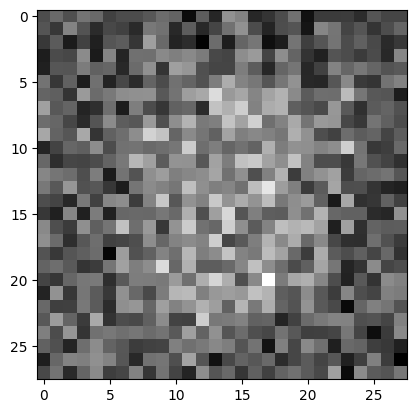

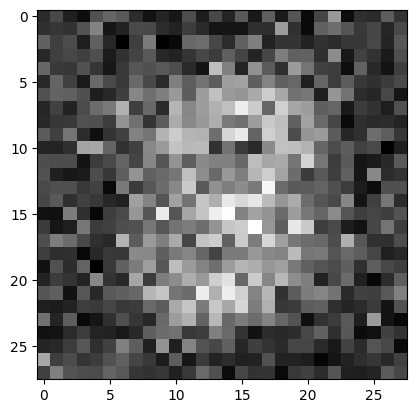

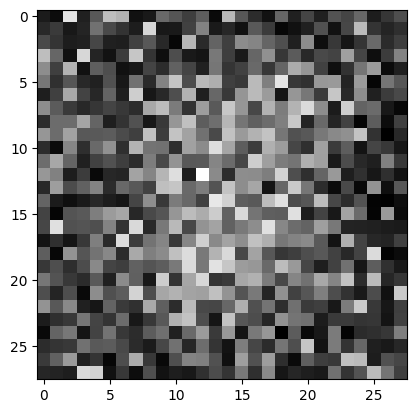

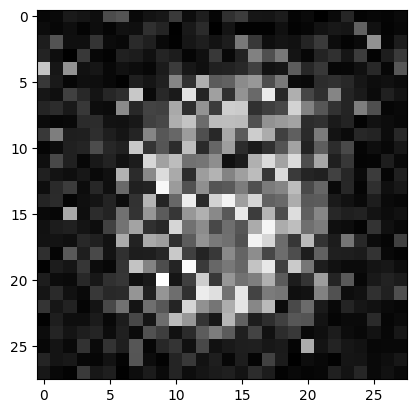

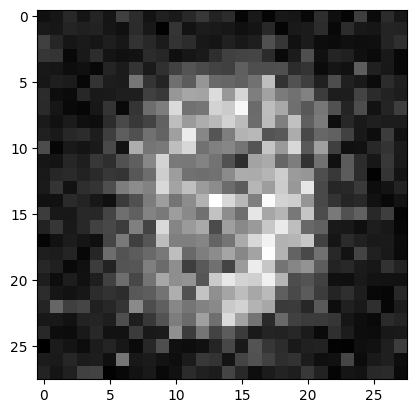

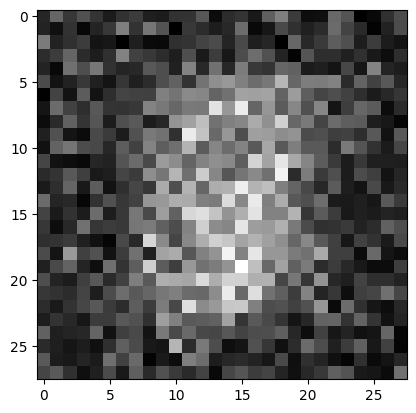

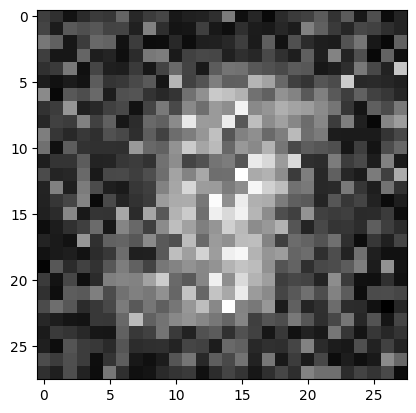

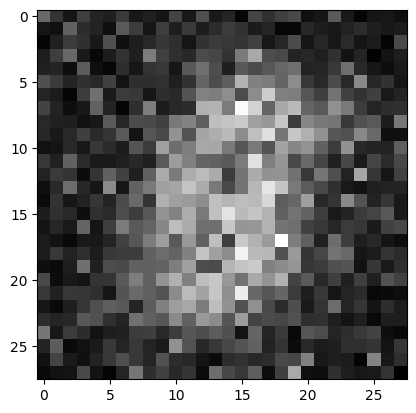

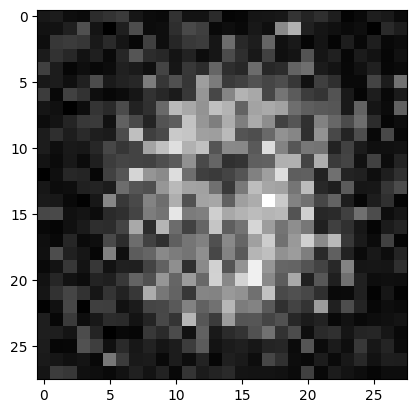

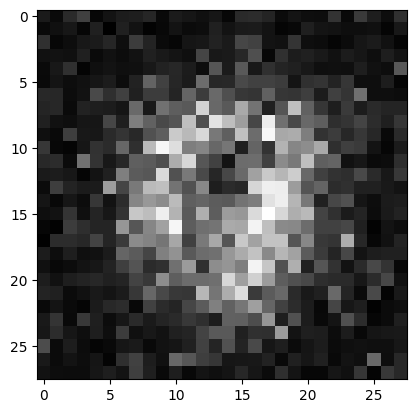

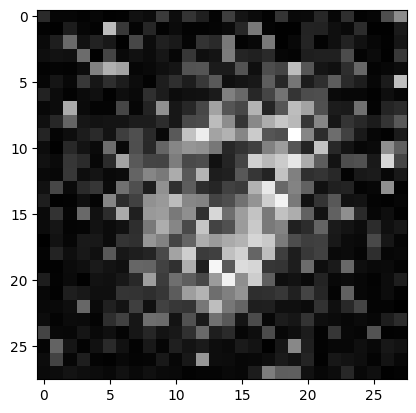

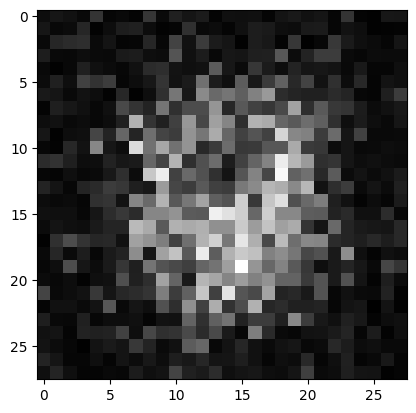

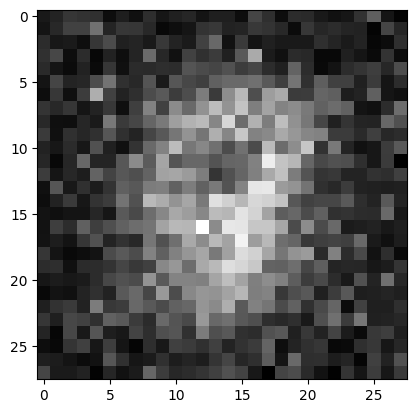

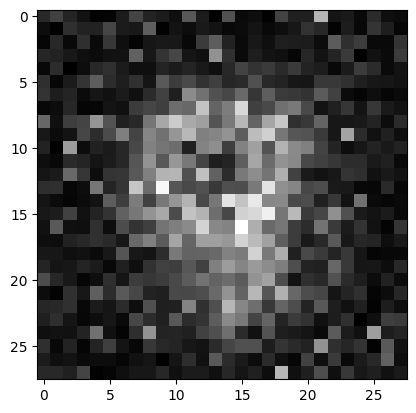

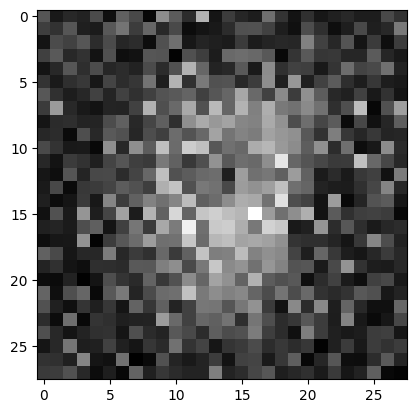

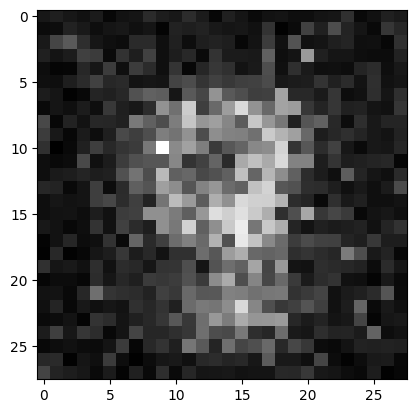

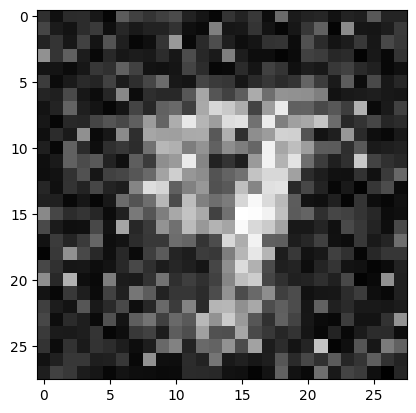

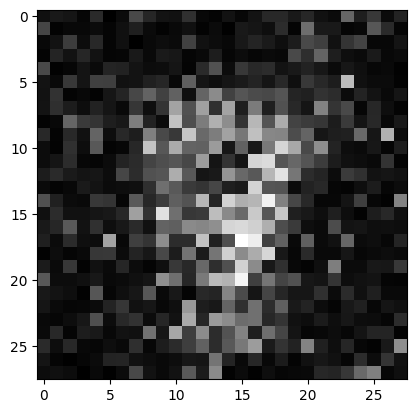

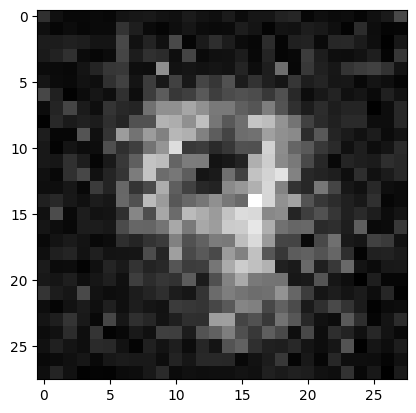

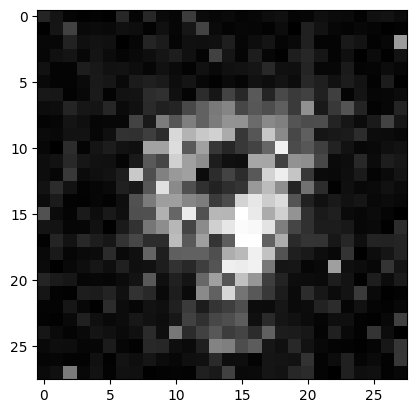

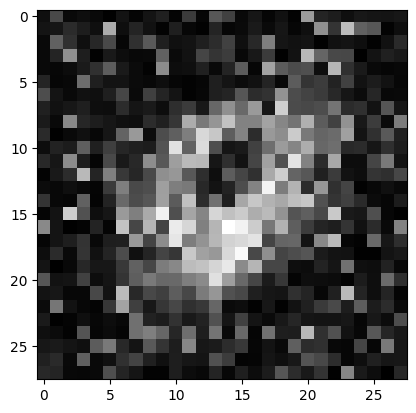

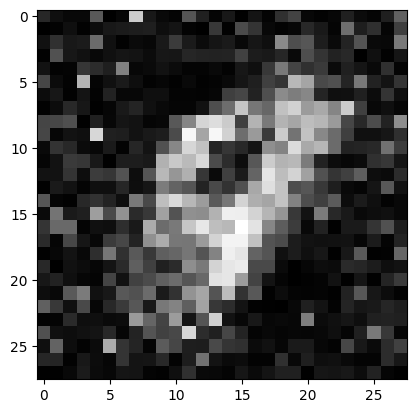

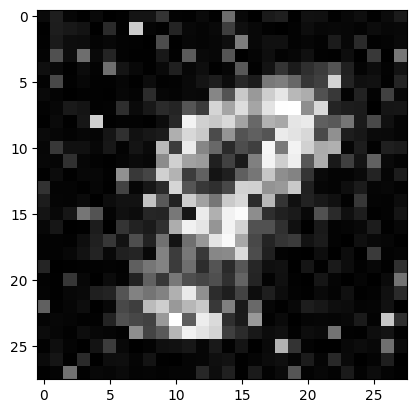

In [ ]:
for i in range(1,Niter):
    
    # générer un batch de données "vraies" et de données "fausses"
    X_real,s_real = generate_real_samples(X_train,n)
    X_fake,s_fake = generate_fake_samples(generator,latent_dim,n)

    # entraîner le discriminateur à partir de ce batch
    discriminator.train_on_batch(X_real,s_real)
    discriminator.train_on_batch(X_fake,s_fake)

    # rendre les paramètres du discriminateur non entraînables
    discriminator_trainable = False
    
    # entraîner le GAN    
    X_gan = np.random.randn(n,latent_dim)
    s_gan = np.ones((n,1))
    gan.train_on_batch(X_gan,s_gan)
    
    # rendre les paramètres du discriminateur à nouveau entraînables
    discriminator_trainable = True
    
    #X_val = np.random.randn(128,5)
    #x=np.random.uniform(-0.5,0.5,1000)
    #y1_p = generator.predict(X_val)
    

    if (i%500==0):
        
        y1_p = generator.predict(X_val)
        y1_p = (1.0/2)*y1_p+1
        y1_p = y1_p*255
        y1_p = y1_p.reshape((128,28,28))

        plt.imshow(y1_p[0],cmap='gray')


        #plt.plot(x,x**2,'b+')
        plt.show()
